# Fitting a Simple Linear Regression in Pytorch

In this practical we will walk through the process of training a simple linear regression model in pytorch. First let's visualise our data. In the cell below, write some code to make a scatter plot of the x and y data.


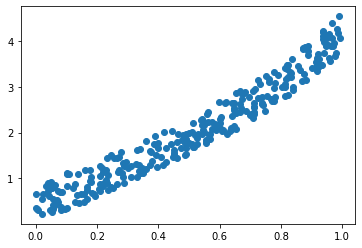

In [25]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

nsamples = 300
x = np.random.rand(nsamples)
y = np.sin(x) * np.power(x, 4) + 3*x + np.random.rand(nsamples)*0.8

# Make a scatter plot of the x and y data
plt.scatter(x, y)


We can create a simple linear model with a single input and output, using the class we defined in the lesson notebook. Run the cell below to create an instance of the `PytorchLinearRegression` class.


In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class PyTorchLinearRegression(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.linear_layer = torch.nn.Linear(num_inputs, num_outputs)

    def forward(self, X):
        return self.linear_layer(X)


linear_regression = PyTorchLinearRegression(1, 1)


In the cell below, call the model on our `x_tensor` data. Then create a scatter plot showing the original `x` and `y` data in one colour, and the `x` and `y_pred` data in a second colour.


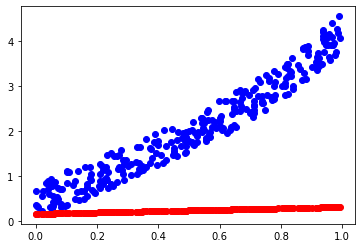

In [27]:
x_tensor = torch.transpose(torch.tensor(
    x, dtype=torch.float32).unsqueeze(0), 0, 1)

# Pass the x_tensor data to the model's forward method, and assign the outputs to a variable called `y_pred`.
y_pred = linear_regression(x_tensor)

# Scatter the original x and y data, and assign the points a blue colour.
plt.scatter(x, y, c='#0000FF')

# Scatter the x and y_pred data, and assing the points a red colour.
# You will need to convert the tensor back to numpy to do so. Use the .detach().numpy() method for this.
plt.scatter(x, y_pred.detach().numpy(), c='#FF0000')


In the next cell, edit the code to initialise the dataloader, and train the model.


In [28]:
from torch.utils.tensorboard import SummaryWriter
from random import shuffle

# This line converts the y data into a torch tensor of the correct format.
y_tensor = torch.transpose(torch.tensor(
    y, dtype=torch.float32).unsqueeze(0), 0, 1)


def create_dummy_dataloader(x_tensor, y_tensor, batch_size=4):
    '''function to create a simple dataloader.'''
    def create_batches(data):
        return [
            data[idx*batch_size: (idx+1) * batch_size] if (idx + 1) * batch_size < len(data)
            else data[idx*batch_size:]
            for idx in range(len(data) // batch_size)
        ]
    batched_X = create_batches(x_tensor)
    batched_y = create_batches(y_tensor)
    return list(zip(batched_X, batched_y))


def train(model, dataloader, epochs=20):
    '''A simple training loop'''

    writer = SummaryWriter()
    optimiser = torch.optim.SGD(model.parameters(), lr=0.01)
    tensor_board_index = 0

    for epoch in range(epochs):
        shuffle(dataloader)
        for batch in dataloader:
            features, labels = batch
            prediction = model(features)
            loss = torch.nn.functional.mse_loss(prediction, labels)
            loss.backward()
            optimiser.step()
            optimiser.zero_grad()

            # Logging
            writer.add_scalar("Loss/Train", loss.item(), tensor_board_index)
            tensor_board_index += 1

        # print("Loss:", loss.item())
        # print()


In [29]:
# initialise the dataloader by calling our create_dummy_dataloader function on the x_tensor and y_tensor inputs.
data_loader = create_dummy_dataloader(x_tensor, y_tensor)
optimiser = torch.optim.SGD(linear_regression.parameters(), lr=0.01)

# train the model by calling our `train` function on our linear_regression model and dataloader.
train(linear_regression, data_loader, 20)


Now let's plot our data again, to see if the model has fit the data correctly.


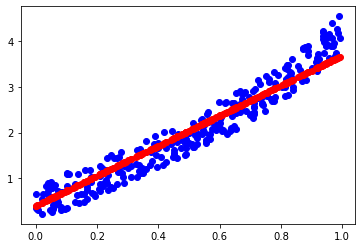

In [31]:
# Pass the x_tensor data to the model's forward method a second time, and assign the outputs to `y_pred` again`
y_pred = linear_regression(x_tensor)

# Scatter the original x and y data, and assign the points a blue colour.
plt.scatter(x, y, c='#0000FF')

# Scatter the x and y_pred data, and assing the points a red colour.
plt.scatter(x, y_pred.detach().numpy(), c='#FF0000')

# Has the fit improved?
# Yes!
